#### Treinamento

Teste feito com as seguintes observações
- Colunas nome e ticket foram excluidas
- Cabines pegamos apenas a letra da cabine
- Idades faltantes preenchidas com a média aritimética
- Valores normalizados
- Acuracia: 78%
- K = 5

Importando as bibliotecas necessárias

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
pd.set_option('future.no_silent_downcasting', True)

Lendo o arquivo de treino

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Avaliando a existência de dados nulos

In [4]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Na coluna de idade iremos preencher os dados faltantes com a média das idades
- Na coluna de cabine iremos pegar somente a letra da cabine, e prencher com um 'X' os valores nulos
- Na coluna de embarque, existem 2 registros nulos, como são poucos, iremos remover esses dois registros

Tratando 'Cabin'

In [5]:
df_train['CabinDeck'] = df_train['Cabin'].str.extract(r'([A-Za-z])') 
df_train['CabinDeck'] = df_train['CabinDeck'].fillna('X')

Removendo as colunas 'Name', 'Cabin', 'Ticket'

In [6]:
df_train = df_train.drop(['Name', 'Ticket', 'Cabin'], axis=1)

Aplicado a media das idades nos registros faltantes

In [7]:
df_train['Age'] = df_train['Age'].fillna(round(df_train['Age'].mean()))

In [8]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinDeck
0,1,0,3,male,22.0,1,0,7.2500,S,X
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,S,X
3,4,1,1,female,35.0,1,0,53.1000,S,C
4,5,0,3,male,35.0,0,0,8.0500,S,X
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,X
887,888,1,1,female,19.0,0,0,30.0000,S,B
888,889,0,3,female,30.0,1,2,23.4500,S,X
889,890,1,1,male,26.0,0,0,30.0000,C,C


Apagar registros que ainda sobrarem dados nulos

In [9]:
df_train.dropna(inplace=True)

Agora o dataset está sem valores nulos

In [10]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
CabinDeck      0
dtype: int64

In [11]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinDeck
0,1,0,3,male,22.0,1,0,7.2500,S,X
1,2,1,1,female,38.0,1,0,71.2833,C,C
2,3,1,3,female,26.0,0,0,7.9250,S,X
3,4,1,1,female,35.0,1,0,53.1000,S,C
4,5,0,3,male,35.0,0,0,8.0500,S,X
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,X
887,888,1,1,female,19.0,0,0,30.0000,S,B
888,889,0,3,female,30.0,1,2,23.4500,S,X
889,890,1,1,male,26.0,0,0,30.0000,C,C


Com a coluna de genero, iremos atribuir 0 para feminino e 1 para masculino 

In [12]:
df_train['Sex'] = df_train['Sex'].replace({'female': 0, 'male': 1})
df_train = df_train.infer_objects(copy=False)

In [13]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinDeck
0,1,0,3,1,22.0,1,0,7.2500,S,X
1,2,1,1,0,38.0,1,0,71.2833,C,C
2,3,1,3,0,26.0,0,0,7.9250,S,X
3,4,1,1,0,35.0,1,0,53.1000,S,C
4,5,0,3,1,35.0,0,0,8.0500,S,X
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,S,X
887,888,1,1,0,19.0,0,0,30.0000,S,B
888,889,0,3,0,30.0,1,2,23.4500,S,X
889,890,1,1,1,26.0,0,0,30.0000,C,C


Transformando as colunas 'Embarked' e 'CabinDeck' em variáveis dummies

In [14]:
df_train = pd.get_dummies(df_train, columns=['Embarked', 'CabinDeck'])

In [15]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_X
0,1,0,3,1,22.0,1,0,7.2500,False,False,True,False,False,False,False,False,False,False,False,True
1,2,1,1,0,38.0,1,0,71.2833,True,False,False,False,False,True,False,False,False,False,False,False
2,3,1,3,0,26.0,0,0,7.9250,False,False,True,False,False,False,False,False,False,False,False,True
3,4,1,1,0,35.0,1,0,53.1000,False,False,True,False,False,True,False,False,False,False,False,False
4,5,0,3,1,35.0,0,0,8.0500,False,False,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,False,False,True,False,False,False,False,False,False,False,False,True
887,888,1,1,0,19.0,0,0,30.0000,False,False,True,False,True,False,False,False,False,False,False,False
888,889,0,3,0,30.0,1,2,23.4500,False,False,True,False,False,False,False,False,False,False,False,True
889,890,1,1,1,26.0,0,0,30.0000,True,False,False,False,False,True,False,False,False,False,False,False


Normalizando os dados

In [16]:
scaler = MinMaxScaler()
df_train_normalized = scaler.fit_transform(df_train)
df_train_normalized = pd.DataFrame(df_train_normalized, columns=df_train.columns)
df_train_normalized.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_X
0,0.000000,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.001124,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.002247,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.003371,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.004494,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
df_train_normalized.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_X
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.500000,0.382452,0.655793,0.649044,0.368099,0.065523,0.063742,0.062649,0.188976,0.086614,0.724409,0.016873,0.050619,0.066367,0.037120,0.035996,0.014623,0.004499,0.001125,0.772778
std,0.288762,0.486260,0.417350,0.477538,0.162970,0.137963,0.134460,0.097003,0.391710,0.281427,0.447063,0.128868,0.219341,0.249062,0.189163,0.186384,0.120106,0.066964,0.033539,0.419273
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250562,0.000000,0.500000,0.000000,0.271174,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.500000,0.000000,1.000000,1.000000,0.371701,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.749438,1.000000,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Agora iremos definir o X e o y, removendo a coluna 'Survived' que é o alvo

In [18]:
X = df_train_normalized.drop(['Survived',], axis=1)
y = df_train['Survived']

Assim fica o X, os dados que serão treinados

In [19]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_X
0,0.000000,1.0,1.0,0.271174,0.125,0.000000,0.014151,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.001124,0.0,0.0,0.472229,0.125,0.000000,0.139136,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.002247,1.0,0.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.003371,0.0,0.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.004494,1.0,1.0,0.434531,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0.995506,0.5,1.0,0.334004,0.000,0.000000,0.025374,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
885,0.996629,0.0,0.0,0.233476,0.000,0.000000,0.058556,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
886,0.997753,1.0,0.0,0.371701,0.125,0.333333,0.045771,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.998876,0.0,1.0,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Assim fica o y, o alvo

In [20]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

Separamos os dados para treino, 80% para treino e 20% para validação

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Usamos a tecnica de cross validation para definir um ótimo valor para k

Melhor valor de k: 8
Melhor acurácia: 0.8065


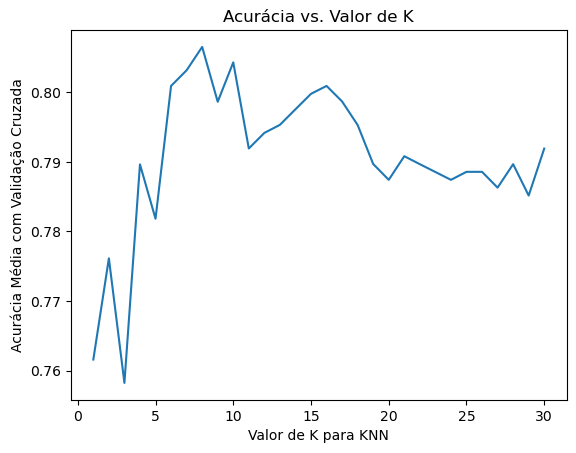

In [22]:
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

melhor_k = k_range[k_scores.index(max(k_scores))]
melhor_score = max(k_scores)

print(f"Melhor valor de k: {melhor_k}")
print(f"Melhor acurácia: {melhor_score:.4f}")

plt.plot(k_range, k_scores)
plt.xlabel('Valor de K para KNN')
plt.ylabel('Acurácia Média com Validação Cruzada')
plt.title('Acurácia vs. Valor de K')
plt.show()

Definimos o modelo de classificação com o valor de k definido na etapa de cross validation

In [23]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

Treinamos o modelo

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

#### Métricas

Acuracia do modelo

In [25]:
print(knn.score(X_test, y_test))

0.7865168539325843


Predição do modelo

In [26]:
y_pred = knn.predict(X_test)

Matriz de confusão

Verdadeiros Positivos: 49
Verdadeiros Negativos: 91
Falsos Positivos: 18
Falsos Negativos: 20


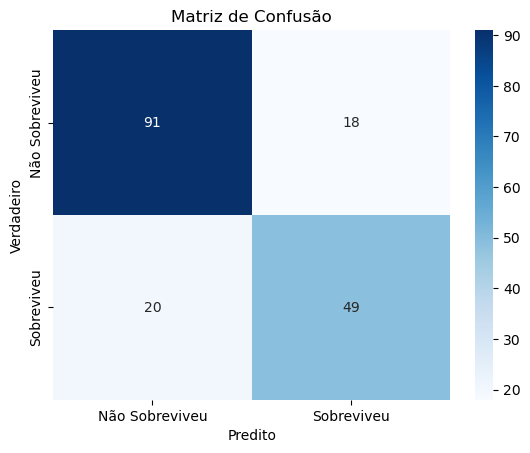

In [27]:
cm = confusion_matrix(y_test, y_pred)
VP = cm[1, 1]
VN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
print(f'Verdadeiros Positivos: {VP}')
print(f'Verdadeiros Negativos: {VN}')
print(f'Falsos Positivos: {FP}')
print(f'Falsos Negativos: {FN}')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Sobreviveu', 'Sobreviveu'], yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

Relatório de classificação

In [28]:
print(classification_report(y_test, y_pred, target_names=['Não Sobreviveu', 'Sobreviveu']))

                precision    recall  f1-score   support

Não Sobreviveu       0.82      0.83      0.83       109
    Sobreviveu       0.73      0.71      0.72        69

      accuracy                           0.79       178
     macro avg       0.78      0.77      0.77       178
  weighted avg       0.79      0.79      0.79       178



Taxa de Erro (Proporção de previsões incorretas)

In [29]:
taxa_erro = 1 - accuracy_score(y_test, y_pred)

In [30]:
taxa_erro

0.2134831460674157

Especificidade (Taxa de verdadeiros negativos)

In [31]:
especificidade = VN / (VN + FP)

In [32]:
especificidade

0.8348623853211009

Sensibilidade (Taxa de verdadeiros positivos)

In [33]:
sensibilidade = recall_score(y_test, y_pred)

In [34]:
sensibilidade

0.7101449275362319

Precisão (Proporção de previsões positivas corretas)

In [35]:
precisao = precision_score(y_test, y_pred)

In [36]:
precisao

0.7313432835820896

Índice de Youden

In [37]:
indice_youden = sensibilidade + especificidade - 1

In [38]:
indice_youden

0.545007312857333

#### Validação do modelo

Carregamento dos dados de validação

In [39]:
df_validation = pd.read_csv('validation.csv')

In [40]:
df_validation

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Verificando dados nulos

In [41]:
df_validation.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Tratando os dados faltantes

In [42]:
df_validation['Age'] = df_validation['Age'].fillna(round(df_validation['Age'].mean()))
df_validation['Fare'] = df_validation['Fare'].fillna(round(df_validation['Fare'].mean()))
df_validation['CabinDeck'] = df_validation['Cabin'].str.extract(r'([A-Za-z])') 
df_validation['CabinDeck'] = df_validation['CabinDeck'].fillna('X')

In [43]:
df_validation

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinDeck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,X
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,X
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,X
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,X
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,X
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,S,X
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,X
416,1308,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,NaN,S,X


Removendo as colunas 'Name', 'Cabin', 'Ticket'

In [44]:
df_validation = df_validation.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [45]:
df_validation

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinDeck
0,892,3,male,34.5,0,0,7.8292,Q,X
1,893,3,female,47.0,1,0,7.0000,S,X
2,894,2,male,62.0,0,0,9.6875,Q,X
3,895,3,male,27.0,0,0,8.6625,S,X
4,896,3,female,22.0,1,1,12.2875,S,X
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30.0,0,0,8.0500,S,X
414,1306,1,female,39.0,0,0,108.9000,C,C
415,1307,3,male,38.5,0,0,7.2500,S,X
416,1308,3,male,30.0,0,0,8.0500,S,X


Com a coluna de genero, iremos atribuir 0 para feminino e 1 para masculino 

In [46]:
df_validation['Sex'] = df_validation['Sex'].replace({'female': 0, 'male': 1})
df_validation = df_validation.infer_objects(copy=False)

Transformando coluna 'Embarked' em variável dummy

In [47]:
df_validation = pd.get_dummies(df_validation, columns=['Embarked', 'CabinDeck'])

In [48]:
df_validation

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_X
0,892,3,1,34.5,0,0,7.8292,False,True,False,False,False,False,False,False,False,False,True
1,893,3,0,47.0,1,0,7.0000,False,False,True,False,False,False,False,False,False,False,True
2,894,2,1,62.0,0,0,9.6875,False,True,False,False,False,False,False,False,False,False,True
3,895,3,1,27.0,0,0,8.6625,False,False,True,False,False,False,False,False,False,False,True
4,896,3,0,22.0,1,1,12.2875,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,30.0,0,0,8.0500,False,False,True,False,False,False,False,False,False,False,True
414,1306,1,0,39.0,0,0,108.9000,True,False,False,False,False,True,False,False,False,False,False
415,1307,3,1,38.5,0,0,7.2500,False,False,True,False,False,False,False,False,False,False,True
416,1308,3,1,30.0,0,0,8.0500,False,False,True,False,False,False,False,False,False,False,True


In [49]:
col_index = df_validation.columns.get_loc('CabinDeck_X')
df_validation.insert(col_index, 'CabinDeck_T', 0)

Padronizando os dados

In [50]:
df_val_normalized = scaler.fit_transform(df_validation)
df_val_normalized = pd.DataFrame(df_val_normalized, columns=df_validation.columns)
df_val_normalized.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_X
0,0.000000,1.0,1.0,0.452723,0.000,0.000000,0.015282,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.002398,1.0,0.0,0.617566,0.125,0.000000,0.013663,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.004796,0.5,1.0,0.815377,0.000,0.000000,0.018909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.007194,1.0,1.0,0.353818,0.000,0.000000,0.016908,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.009592,1.0,0.0,0.287881,0.125,0.111111,0.023984,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
df_val_normalized.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_X
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.0,418.000000
mean,0.500000,0.632775,0.636364,0.396235,0.055921,0.043594,0.069541,0.244019,0.110048,0.645933,0.016746,0.043062,0.083732,0.031100,0.021531,0.019139,0.002392,0.0,0.782297
std,0.289713,0.420919,0.481622,0.166623,0.112095,0.109048,0.108993,0.430019,0.313324,0.478803,0.128474,0.203240,0.277317,0.173797,0.145320,0.137177,0.048912,0.0,0.413179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.250000,0.000000,0.000000,0.301068,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,0.500000,1.000000,1.000000,0.393380,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,0.750000,1.000000,1.000000,0.469207,0.125000,0.000000,0.061484,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [52]:
df_val_normalized

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_X
0,0.000000,1.0,1.0,0.452723,0.000,0.000000,0.015282,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.002398,1.0,0.0,0.617566,0.125,0.000000,0.013663,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.004796,0.5,1.0,0.815377,0.000,0.000000,0.018909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.007194,1.0,1.0,0.353818,0.000,0.000000,0.016908,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.009592,1.0,0.0,0.287881,0.125,0.111111,0.023984,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.990408,1.0,1.0,0.393380,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,0.992806,0.0,0.0,0.512066,0.000,0.000000,0.212559,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
415,0.995204,1.0,1.0,0.505473,0.000,0.000000,0.014151,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,0.997602,1.0,1.0,0.393380,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Predição com os dados do arquivo de validação

In [53]:
validation_result = knn.predict(df_val_normalized)

In [54]:
validation_result

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [55]:
df_val_normalized

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_X
0,0.000000,1.0,1.0,0.452723,0.000,0.000000,0.015282,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.002398,1.0,0.0,0.617566,0.125,0.000000,0.013663,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.004796,0.5,1.0,0.815377,0.000,0.000000,0.018909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.007194,1.0,1.0,0.353818,0.000,0.000000,0.016908,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.009592,1.0,0.0,0.287881,0.125,0.111111,0.023984,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.990408,1.0,1.0,0.393380,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,0.992806,0.0,0.0,0.512066,0.000,0.000000,0.212559,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
415,0.995204,1.0,1.0,0.505473,0.000,0.000000,0.014151,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,0.997602,1.0,1.0,0.393380,0.000,0.000000,0.015713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Revertendo a normalização para gerar o arquivo de resultado

In [56]:
df_result = scaler.inverse_transform(df_val_normalized)
df_result = pd.DataFrame(df_result, columns=df_validation.columns)
df_result['Survived'] = validation_result
int_columns = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
               'CabinDeck_A', 'CabinDeck_B', 'CabinDeck_C', 'CabinDeck_D', 'CabinDeck_E', 'CabinDeck_F', 'CabinDeck_G',
               'CabinDeck_T', 'CabinDeck_X']
for column in int_columns:
    df_result[column] = df_result[column].round().astype(int)

In [57]:
df_result

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinDeck_X,Survived
0,892,3,1,34,0,0,7.8292,0,1,0,0,0,0,0,0,0,0,0,1,0
1,893,3,0,47,1,0,7.0000,0,0,1,0,0,0,0,0,0,0,0,1,0
2,894,2,1,62,0,0,9.6875,0,1,0,0,0,0,0,0,0,0,0,1,0
3,895,3,1,27,0,0,8.6625,0,0,1,0,0,0,0,0,0,0,0,1,0
4,896,3,0,22,1,1,12.2875,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,30,0,0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1,0
414,1306,1,0,39,0,0,108.9000,1,0,0,0,0,1,0,0,0,0,0,0,1
415,1307,3,1,38,0,0,7.2500,0,0,1,0,0,0,0,0,0,0,0,1,0
416,1308,3,1,30,0,0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1,0


Gerando arquivo de resultado com 'PassengerId' e 'Survived'

In [58]:
df_result[['PassengerId', 'Survived']].to_csv('result.csv', index=False)

#### Gráficos

Taxa de Sobrevivência por Gênero

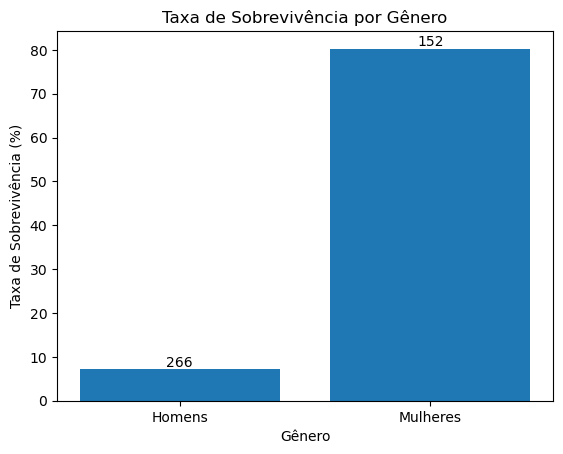

In [59]:
df_result['Sex'] = df_result['Sex'].replace({0: 'Mulheres', 1: 'Homens'})
df_result = df_result.infer_objects(copy=False)
survival_gender = df_result.groupby('Sex')['Survived'].mean() * 100
count_by_gender = df_result['Sex'].value_counts()

fig, ax = plt.subplots()
bars = ax.bar(survival_gender.index, survival_gender.values)
ax.bar_label(bars, labels=[f'{count_by_gender[gender]}' for gender in survival_gender.index])

plt.title('Taxa de Sobrevivência por Gênero')
plt.xlabel('Gênero')
plt.xticks(rotation=0)
plt.ylabel('Taxa de Sobrevivência (%)')
plt.show()

Taxa de Sobrevivência por Classe

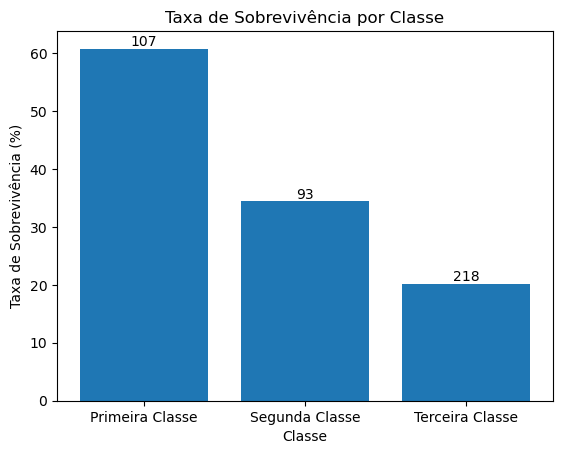

In [60]:
survival_class = df_result.groupby('Pclass')['Survived'].mean() * 100
count_by_class = df_result['Pclass'].value_counts()
class_names = ['Primeira Classe', 'Segunda Classe', 'Terceira Classe']

fig, ax = plt.subplots()
bars = ax.bar(survival_class.index, survival_class.values)
ax.bar_label(bars, labels=[f'{count_by_class[pclass]}' for pclass in survival_class.index])

plt.xticks(ticks=survival_class.index, labels=class_names)
plt.title('Taxa de Sobrevivência por Classe')
plt.xlabel('Classe')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.xticks(rotation=0)
plt.show()


Taxa de Sobrevivência em Relação à Tarifa Paga

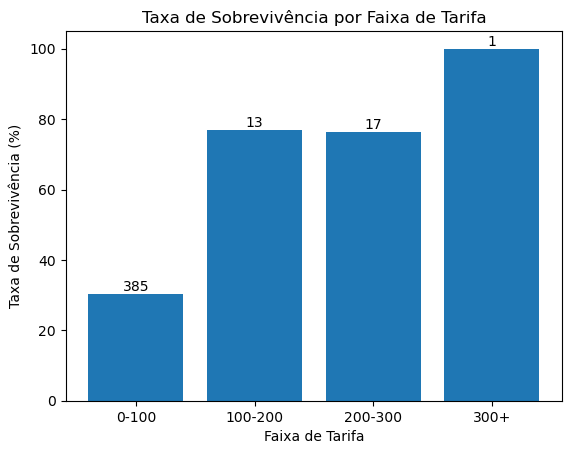

In [61]:
bins = [0, 100, 200, 300, 1000]
labels = ['0-100', '100-200', '200-300', '300+']
df_result['Fare_bin'] = pd.cut(df_result['Fare'], bins=bins, labels=labels)

survival_fare = df_result.groupby('Fare_bin', observed=False)['Survived'].mean() * 100
count_by_fare = df_result['Fare_bin'].value_counts()

fig, ax = plt.subplots()
bars = ax.bar(survival_fare.index, survival_fare.values)
ax.bar_label(bars, labels=[f'{count_by_fare[fare]}' for fare in survival_fare.index])

plt.title('Taxa de Sobrevivência por Faixa de Tarifa')
plt.xlabel('Faixa de Tarifa')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.xticks(rotation=0)
plt.show()

Sobrevivência em Relação a Familiares a Bordo

Sobrevivência por Presença de Irmãos/Cônjuge

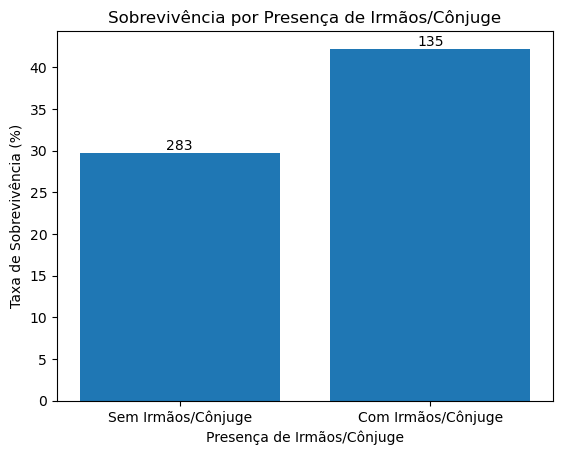

In [62]:
df_result['Has_SibSp'] = df_result['SibSp'].apply(lambda x: 1 if x > 0 else 0)

survival_sibsp = df_result.groupby('Has_SibSp')['Survived'].mean() * 100
count_by_sibsp = df_result['Has_SibSp'].value_counts()
sibsp_names = ['Sem Irmãos/Cônjuge', 'Com Irmãos/Cônjuge']

fig, ax = plt.subplots()
bars = ax.bar(survival_sibsp.index, survival_sibsp.values)
ax.bar_label(bars, labels=[f'{count_by_sibsp[sibsp]}' for sibsp in survival_sibsp.index])

plt.xticks(ticks=survival_sibsp.index, labels=sibsp_names)
plt.title('Sobrevivência por Presença de Irmãos/Cônjuge')
plt.xlabel('Presença de Irmãos/Cônjuge')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.xticks(rotation=0)
plt.show()

Sobrevivência por Presença de Pais/Filhos

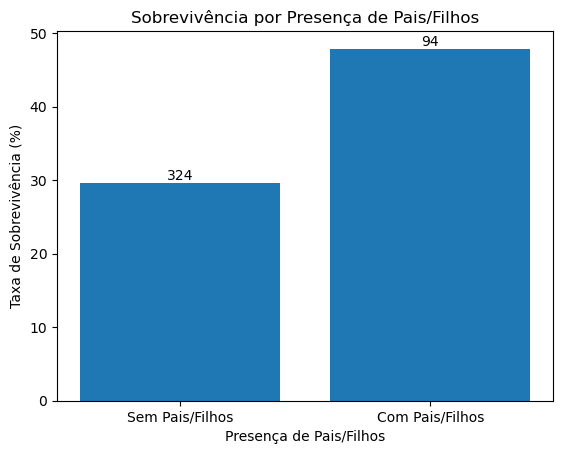

In [63]:
df_result['Has_ParCh'] = df_result['Parch'].apply(lambda x: 1 if x > 0 else 0)
count_by_parch = df_result['Has_ParCh'].value_counts()
parch_names = ['Sem Pais/Filhos', 'Com Pais/Filhos']

survival_parch = df_result.groupby('Has_ParCh')['Survived'].mean() * 100

fig, ax = plt.subplots()
bars = ax.bar(survival_parch.index, survival_parch.values)
ax.bar_label(bars, labels=[f'{count_by_parch[parch]}' for parch in survival_parch.index])

plt.xticks(ticks=survival_parch.index, labels=parch_names)
plt.title('Sobrevivência por Presença de Pais/Filhos')
plt.xlabel('Presença de Pais/Filhos')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.xticks(rotation=0)
plt.show()


Sobrevivência em Relação a Idade

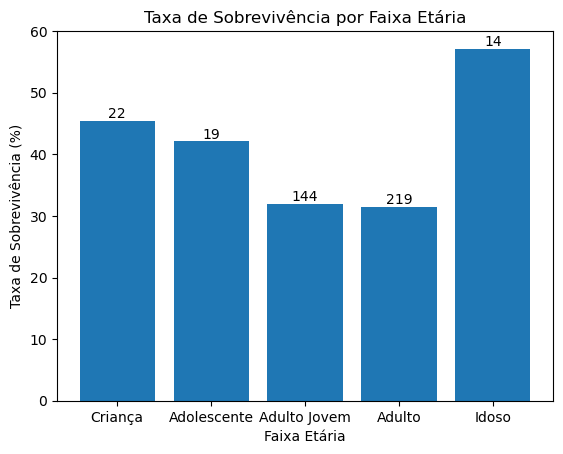

In [64]:
bins = [0, 12, 18, 30, 60, 80]
labels = ['Criança', 'Adolescente', 'Adulto Jovem', 'Adulto', 'Idoso']

df_result['Faixa Etária'] = pd.cut(df_result['Age'], bins=bins, labels=labels, right=False)
count_by_age = df_result['Faixa Etária'].value_counts()
survival_by_age = df_result.groupby('Faixa Etária', observed=False)['Survived'].mean() * 100

fig, ax = plt.subplots()
bars = ax.bar(survival_by_age.index, survival_by_age.values)
ax.bar_label(bars, labels=[f'{count_by_age[age]}' for age in survival_by_age.index])

plt.title('Taxa de Sobrevivência por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.xticks(rotation=0)
plt.ylabel('Taxa de Sobrevivência (%)')
plt.show()

Sobrevivência em relação a Cabine

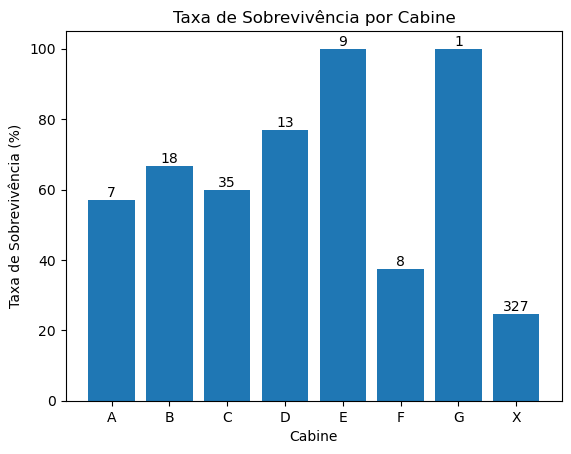

In [65]:
df_result['Cabin'] = df_result[['CabinDeck_E', 'CabinDeck_D', 'CabinDeck_B', 'CabinDeck_C', 'CabinDeck_A', 'CabinDeck_F', 'CabinDeck_G', 'CabinDeck_T', 'CabinDeck_X']].idxmax(axis=1)
df_result['Cabin'] = df_result['Cabin'].str.replace('CabinDeck_', '')

count_by_cabin_deck = df_result['Cabin'].value_counts()
survival_by_cabin_deck = df_result.groupby('Cabin')['Survived'].mean() * 100 

fig, ax = plt.subplots()
bars = ax.bar(survival_by_cabin_deck.index, survival_by_cabin_deck.values)
ax.bar_label(bars, labels=[f'{count_by_cabin_deck[cabin]}' for cabin in survival_by_cabin_deck.index])

plt.title('Taxa de Sobrevivência por Cabine')
plt.xlabel('Cabine')
plt.xticks(rotation=0)
plt.ylabel('Taxa de Sobrevivência (%)')
plt.show()

Sobrevivência em relação ao Local de Embarque

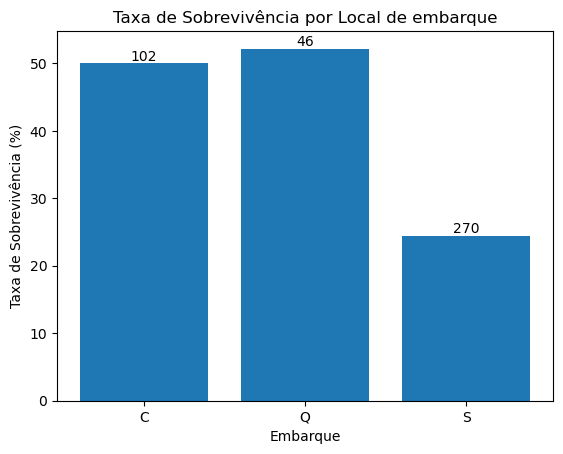

In [66]:
df_result['Embarked'] = df_result[['Embarked_C', 'Embarked_Q', 'Embarked_S']].idxmax(axis=1)
df_result['Embarked'] = df_result['Embarked'].str.replace('Embarked_', '')

count_by_embarked = df_result['Embarked'].value_counts()
survival_by_embarked = df_result.groupby('Embarked')['Survived'].mean() * 100 

fig, ax = plt.subplots()
bars = ax.bar(survival_by_embarked.index, survival_by_embarked.values)
ax.bar_label(bars, labels=[f'{count_by_embarked[embarked]}' for embarked in survival_by_embarked.index])

plt.title('Taxa de Sobrevivência por Local de embarque')
plt.xlabel('Embarque')
plt.xticks(rotation=0)
plt.ylabel('Taxa de Sobrevivência (%)')
plt.show()

Sobrevivência em relação ao Tamanho da Família

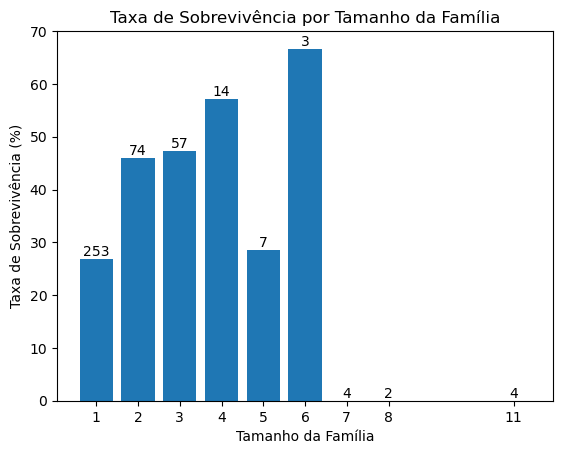

In [67]:
df_result['FamilySize'] = df_result['SibSp'] + df_result['Parch'] + 1
survival_by_family_size = df_result.groupby('FamilySize')['Survived'].mean() * 100 
count_by_family_size = df_result['FamilySize'].value_counts()

fig, ax = plt.subplots()
bars = ax.bar(survival_by_family_size.index, survival_by_family_size.values)
ax.bar_label(bars, labels=[f'{count_by_family_size[size]}' for size in survival_by_family_size.index])

plt.title('Taxa de Sobrevivência por Tamanho da Família')
plt.xlabel('Tamanho da Família')
plt.ylabel('Taxa de Sobrevivência (%)')
plt.xticks(ticks=survival_by_family_size.index) 
plt.xticks(rotation=0)
plt.show()